## Multivariate Statistik und Machine Learning: Assignment 2

The exercises on this sheet are graded by a maximum of 10 points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

If you use any code fragments found on the Internet, make sure you reference them properly.




### Exercise 1 -- Density Estimation

The histogram is considered the simplest form of non-parametric density estimation. To plot a histogram we divide the sample space into a number of bins and approximate the density at the center of each bin by the fraction of points in the training data that fall into the corresponding bin. 

The histogram requires two parameters to be defined: **bin width** and **starting position**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal

In [2]:
# generate some random data to work with
np.random.seed(19)
x1 = np.random.normal(0, 2, size = 2000)
x2 = np.random.normal(10, 5, size = 2000)
data = [x1, x2]

For the data defined above, plot histograms as shown in figure. 

(a) Write the approximate bin size for generating these histograms.

(b) How does the bin size affect the plot? Also, write the drawbacks of using histogram for density estimation.

In [3]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/hist_1.png'></td><td><img src='img/hist_2.png'></td><td><img src='img/hist_3.png'></td></tr></table>"))

,,


In [4]:
def plot_hist(data, bins):
    for x in data:
        plt.hist(x, bins = bins, normed = True, alpha = 0.6)

    plt.xlim(-10, 20)

Answer (a)

Answer (b)

The kernel density estimate is:

$$ \textit{Pr}(x) = \frac{1}{Nh^d} \sum_{i=1}^{N} \phi_{h}(x - x_{i}) $$

where $\phi_h$ is the kernel function, $h$ is the bandwidth of the kernel. 

(c) Implement the functions `kernel_density_estimation` and `ker_g` to calculate the density for the above two distributions. Also calculate the true density and plot it for bandwidth values $[0.3,1, 5]$

You cannot use already implemented functions for `kernel density estimation` or gaussian kernel in python libraries but you can test if your implementation is correct using `sklearn.neighbors.KernelDensity`. 
Other helpful functions that you might need: `np.linspace`, `scipy.stats.norm`

In [5]:
def ker_g(x,h):
    #define gaussian kernel here
    phi = 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x/h)**2)
    
    return phi

In [6]:
def kernel_density_estimation(x, x_grid, bandwidth, ker):
    #define kde function here
    N = x.shape[0]
    


In [7]:
# data for kernel density estimation
# sample points from the distributions
x = np.concatenate([norm(0, 2).rvs(400),
                    norm(10, 5).rvs(400)])
x_grid = np.linspace(start = -10, stop = 20, num = 200)

#calculate the true density for the two mixtures. Assume both distribution to have equal weight
pdf_true = #TODO

SyntaxError: invalid syntax (<ipython-input-7-3f20d0752ee4>, line 8)

NameError: name 'x_grid' is not defined

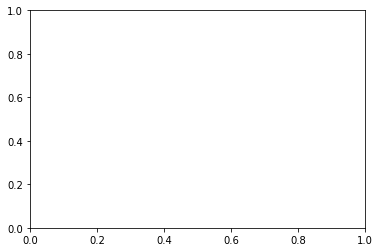

In [8]:
#plot the density estimations along with histogram and true pdf
fig, ax = plt.subplots()
for bandwidth in [0.3,1, 5]:
    ax.plot(x_grid, kernel_density_estimation(x, x_grid, bandwidth, ker_g),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.plot(x_grid, pdf_true, label='true pdf', linewidth=3, alpha=0.5)
ax.hist(x, 100, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(-10, 20)
ax.legend(loc='upper left')

You can check your function using following code

In [ ]:
from sklearn.neighbors import KernelDensity

def kde_1(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(kernel = 'gaussian', bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [ ]:
fig, ax = plt.subplots()
for bandwidth in [0.3,1, 5]:
    ax.plot(x_grid, kde_1(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.plot(x_grid, pdf_true, label='true pdf', linewidth=3, alpha=0.5)
ax.hist(x, 100, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(-10, 20)
ax.legend(loc='upper left')

(d) Observe the effect of different bandwidth values on the estimation and describe it here.

(e) Complete the kernel functions below and plot them including the gaussian kernel defined above.

In [ ]:
# Exponential kernel 
def ker_exp(x,h):
    #TODO

In [ ]:
# Epanechnikov kernel
def ker_epv(x,h):
    #TODO

In [ ]:
# Tophat kernel 
def ker_tophat(x,h):
    #TODO

In [ ]:
# Plot the kernels
u = np.linspace(-5, 5, 10000)
h = 1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(u, ker_g(u, h), '-', c='black', lw=1, label='Gaussian')
ax.plot(u, ker_exp(u,h), '-', c=((0, 0.38, 1)), lw=1, label='Exponential')
ax.plot(u, ker_tophat(u,h), '-', c=((0.30, 1, 0.67)), lw=1, label='Top-hat')
ax.plot(u, ker_epv(u,h), '-', c=((1, 0.48, 0)), lw=1, label='Epanechnikov')

ax.legend(loc=1)

ax.set_xlabel('$u$')
ax.set_ylabel('$K(u)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
plt.show()

### Exercise 2 -- Gaussian Mixture Model and Expectation-Maximization Algorithm

In a Gaussian Mixture Model (GMM) the probability of observing a variable $\mathbf{x}$ can be written as:

$$ p(\mathbf{x}) = \sum_{m=1}^M \alpha_m \mathcal{N}(\mathbf{x}|\mu_m,\Sigma_m) $$

where $\sum_{m=1}^M \alpha_m =1$ and $\alpha_m \in [0,1]$.


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import scipy.stats as st
from utils import *

#### 2.1 -- GMM Sampling
Implement the function `GMM_rvs` which is able to draw samples from a GMM. the function receives as input: the $\alpha$ parameters as a numpy array, a list containing the mean parameters $\mu$ (each mean has dimension $D$), a list containing the covariance matrices $\Sigma$ (each covariance matrix has dimension $D \times D$), and the number of samples to generate. The function returns a numpy array containing the N random samples, the output should be of shape (N_samples,D)

hint: In this exercise you can use, if you want, the following scipy functions:`scipy.stats.multivariate_normal.rvs`, and/or `scipy.stats.uniform.rvs`, and/or `scipy.stats.multinomial.rvs`.

In [ ]:
def GMM_rvs(N,alpha,mu_list,cov_list):
    
    #TODO

You can check your function using the following code:

In [ ]:
alpha = np.array([0.25,0.15,0.35,0.25])

mu_1 = np.array([0,1.])
cov_1 = np.array([[1,-0.8],[-0.8,1]])
mu_2 = np.array([-1.,-1.5])
cov_2 = np.array([[0.25,-0.09],[-0.09,0.25]])
mu_3 = np.array([1,-1.5])
cov_3 = np.array([[0.1,0.0],[0.0,0.1]])
mu_4 = np.array([0,1.25])
cov_4 = np.array([[0.95,0.8],[0.8,0.95]])

mu_list = [mu_1, mu_2, mu_3, mu_4]
cov_list = [cov_1, cov_2, cov_3, cov_4]

N_samples = 900
x = GMM_rvs(N_samples,alpha,mu_list,cov_list)

plot_2d_GMM(mu_list,cov_list,alpha,samples=x,limits=[-3,3])

#### 2.2 -- GMM pdf

implement the function `GMM_pdf` which computes the probability that a given sample is drawn from a GMM. the function receives as input: a sample $x$, the $\alpha$ parameters as a numpy array, and two lists containing the mean vectors $\mu$ and covariance matrices $\Sigma$ of the mixture. The function returns the probability of observing the sample. Make sure the function can process an array of samples as input. 

hint: In this exercise you can use, if you want, the following scipy function `scipy.stats.multivariate_normal.pdf`

In [ ]:
def GMM_pdf(x,alphas,mu_list,cov_list):
    
    #TODO

In [ ]:
x = GMM_rvs(3,alpha,mu_list,cov_list)
p = GMM_pdf(x,alpha,mu_list,cov_list)
print("probability of observing the samples: {}".format(p))

#### 2.3 -- EM algorithm

we now want to implement the EM algorithm. The goal of the algorithm is to estimate the parameters $\alpha$, $\mu$, and $\Sigma$ of a GMM starting from a set samples (see course slides for the algorithm).

In [ ]:
### let's get the samples
x = GMM_rvs(N_samples,alpha,mu_list,cov_list)

In [ ]:
# initialize parameters:
K = 4 # components of the gaussian mixture
alpha_est =
mean_est = 
cov_est = 
gamma = np.zeros((N_samples,K)) 

# online plotting (when you disable this it runs faster)
plot = True

log_p_iter = []
for it in range(0,200):
    
    # compute log(p(x)) (we use the logarithm as p(x) when N_samples is large gets very small)
    log_p_iter.append(np.sum(np.log(GMM_pdf(x,alpha_est,mean_est,cov_est))))

    # plotting 
    if plot:
        plot_2d_GMM(mean_est,cov_est,alpha_est,samples=x,limits=[-3,3])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.close()
    
    gamma_old = gamma.copy() # this is needed to stop the algorithm when it converges, but only works if gamma is anumpy array
    
    # E step
    #TODO
    
    # M step
    #TODO
    
    # check convergence    
    if np.linalg.norm(gamma-gamma_old) < 1e-4:
        print("converged at iteration {}".format(it))
        break

plot_logp_alpha(log_p_iter,alpha_est)
print("final value of p(x): {:.3f}".format(log_p_iter[-1]))

- What is the meaning behind visualizing $p(x)$ as a function of the EM iterations, why is it increasing? (note that here we consider $p(x) = p(x|\mu_\text{est},\Sigma_\text{est},\alpha_\text{est})$ to lighten the notation)
- In this case you know the value of the components $K=4$, as we know the number of Gaussians in the GMM. What happens when you do not know such number? Try to vary the number K and observe how the algorithm works in these cases. What happens to $p(x)$ when you decrease/increase $K$? why?
- Is it possible to make a guess on the number $K$ by looking at the final value of $p(x)$ and to $\alpha_{\text{est}}$

#### Answer here

#### 2.4 -- EM for LiDAR data

we now want to apply EM and GMM to LiDAR data in order to estimate the vegetation height. We have two LiDAR waveforms which are described by a list of samples. we can think of each sample as the time taken by a photon to travel from the light source, be reflected, and travel back to the sensor. In this case the waveforms are collected by a satellite LiDAR instrument aver a forest region.

We are interested in estimating the vegetation height. To do this we need to identify the main first and last peak of the waveform response. The first peak represents the treetop, whereas the last peak comes from the ground level. The ground level peak is usually smaller but rather narrow.

To achieve this goal we decide to use GMM. We basically fit a GMM to the data and measure the difference between the mean of the Gaussian distributions centered around those peaks.

In [ ]:
## we load the data
x = np.load("samples_waveform_forest_idx_900.npy")
#x = np.load("samples_waveform_forest_idx_960.npy")
N_samples = len(x)
plot_1d_GMM(samples=x,limits=[0,400])

In [ ]:
# you can reuse most of the code you wrote above here, just adapt it to the case where the data are one-dimensional

# initialize parameters:
K =  # components of the gaussian mixture
alpha_est = 
mean_est = 
var_est = 
gamma = np.zeros((N_samples,K)) 

# online plotting (when you disable this it runs faster)
plot = False

log_p_iter = []
for it in range(0,200):
    
    gamma_old = gamma.copy() # this is needed to stop the algorithm when it converges, but only works if gamma is anumpy array
    
    # E step
    #TODO
    
    # M step
    #ToDO
    
    # check convergence    
    if np.linalg.norm(gamma-gamma_old) < 1e-4:
        print("converged at iteration {}".format(it))
        break

for k in range(0,K):
    print("component {}: alpha={:.3f} mean={:.3f} std={:.3f}".format(k,alpha_est[k],mean_est[k],np.sqrt(var_est[k])))

In [ ]:
plot_1d_GMM(mean_est,var_est,alpha_est,samples=x,limits=[0,400])

- what is, approximately, the best value for $K$?
- what is the estimated vegetation height for the two waveforms?

#### Answer here